In [1]:
 from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("income.csv")
df.head(1)


,Name,Age,Income($)
0,Rob,27,70000


In [3]:
df = pd.DataFrame(df)
# Drop the "Name" column inplace
df.drop("Name", inplace=True, axis=1)
print(df)

    Age  Income($)
0    27      70000
1    29      90000
2    29      61000
3    28      60000
4    42     150000
5    39     155000
6    41     160000
7    38     162000
8    36     156000
9    35     130000
10   37     137000
11   26      45000
12   27      48000
13   28      51000
14   29      49500
15   32      53000
16   40      65000
17   41      63000
18   43      64000
19   39      80000
20   41      82000
21   39      58000


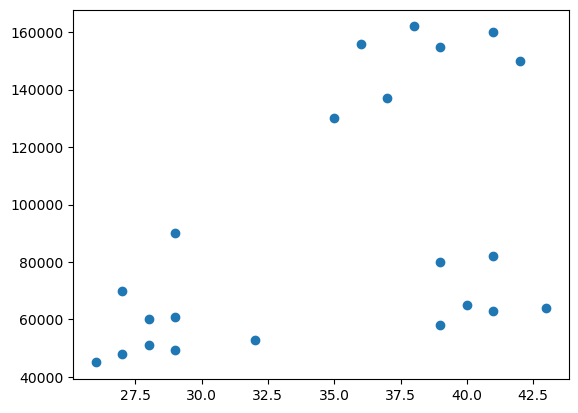

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
k = KMeans(n_clusters = 3)
y_predicted = k.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df['cluster'] = y_predicted
df.head()

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


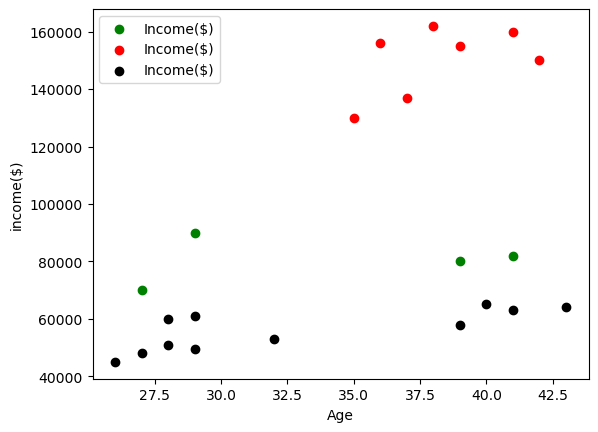

In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age,df1['Income($)'],color = 'green', label = "Income($)")
plt.scatter(df2.Age,df2['Income($)'],color = 'red', label = "Income($)")
plt.scatter(df3.Age,df3['Income($)'],color = 'black', label = "Income($)")
plt.xlabel("Age")
plt.ylabel("income($)")
plt.legend()
# plt.show()

In [8]:
scaler = MinMaxScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])

In [9]:
df

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [10]:
k = KMeans(n_clusters = 3)
y_predicted = k.fit_predict(df[["Age","Income($)"]])

C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
df["cluster"] = y_predicted

In [12]:
k.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428]])

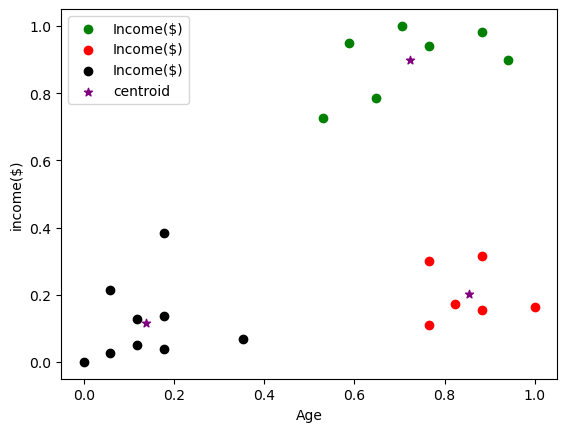

In [13]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age,df1['Income($)'],color = 'green', label = "Income($)")
plt.scatter(df2.Age,df2['Income($)'],color = 'red', label = "Income($)")
plt.scatter(df3.Age,df3['Income($)'],color = 'black', label = "Income($)")
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color = "purple", marker = "*", label  = 'centroid')
plt.xlabel("Age")
plt.ylabel("income($)")
plt.legend()
# plt.show()

C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

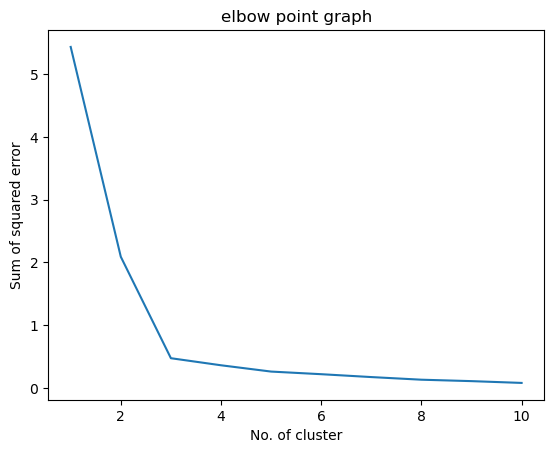

In [14]:
sse = []
for i in range(1,11):
    k = KMeans(n_clusters = i)
    k.fit(df[["Age", 'Income($)']])
    sse.append(k.inertia_)
plt.title("elbow point graph")    
plt.xlabel("No. of cluster")
plt.ylabel("Sum of squared error")
plt.plot(range(1,11),sse)

In [15]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.3625079900797329,
 0.2621792762345213,
 0.2203764169077067,
 0.17462386586687897,
 0.13265419827245162,
 0.10995816883086572,
 0.08139933135681814]

C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asmit\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

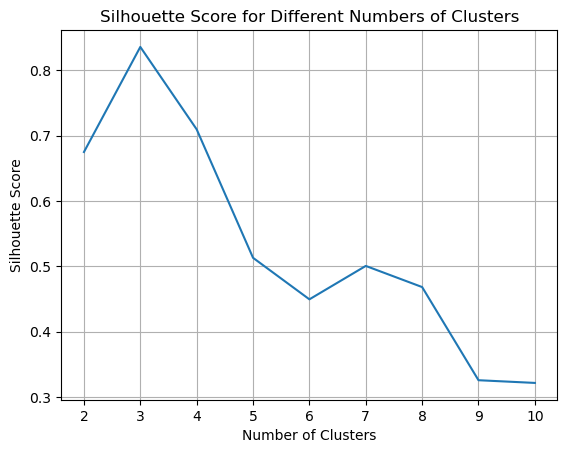

In [16]:
from sklearn.metrics import silhouette_score


max_clusters = 10
cluster_range = range(2, max_clusters + 1)
silhouette_scores_list = []  # Renamed the variable

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores_list.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores_list)  # Updated variable name here as well
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()




